# Identifying phishing mails by using URL and mail features and ML based classification tools

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constructing-Dataset" data-toc-modified-id="Constructing-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constructing Dataset</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-defining-constants" data-toc-modified-id="Importing-libraries-and-defining-constants-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries and defining constants</a></span></li><li><span><a href="#Downloading-and-extracting-mails-(phishing-and-ham-mails)" data-toc-modified-id="Downloading-and-extracting-mails-(phishing-and-ham-mails)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Downloading and extracting mails (phishing and ham mails)</a></span></li><li><span><a href="#Loading-mails" data-toc-modified-id="Loading-mails-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading mails</a></span></li></ul></li><li><span><a href="#Data-preprocessing-and-features-extraction" data-toc-modified-id="Data-preprocessing-and-features-extraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing and features extraction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dropping-duplicates" data-toc-modified-id="Dropping-duplicates-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Dropping duplicates</a></span></li><li><span><a href="#UnderSampling" data-toc-modified-id="UnderSampling-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>UnderSampling</a></span></li></ul></li><li><span><a href="#Word-Cloud-Analysis" data-toc-modified-id="Word-Cloud-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Word Cloud Analysis</a></span></li><li><span><a href="#Mail-Features-extraction-functions" data-toc-modified-id="Mail-Features-extraction-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mail Features extraction functions</a></span><ul class="toc-item"><li><span><a href="#Mail-body-features" data-toc-modified-id="Mail-body-features-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Mail body features</a></span></li><li><span><a href="#URL-features" data-toc-modified-id="URL-features-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>URL features</a></span></li><li><span><a href="#Subject-line-features" data-toc-modified-id="Subject-line-features-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Subject line features</a></span></li><li><span><a href="#Sender's-address-features" data-toc-modified-id="Sender's-address-features-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Sender's address features</a></span></li></ul></li><li><span><a href="#Constructing-dataset-by-extracting-features" data-toc-modified-id="Constructing-dataset-by-extracting-features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Constructing dataset by extracting features</a></span></li></ul></li><li><span><a href="#Split-Training-and-Testing-data" data-toc-modified-id="Split-Training-and-Testing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Training and Testing data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Checking-dataset" data-toc-modified-id="Checking-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checking dataset</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Visualization:-Matplotlib" data-toc-modified-id="Visualization:-Matplotlib-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualization: Matplotlib</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#PCA-for-visualization" data-toc-modified-id="PCA-for-visualization-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>PCA for visualization</a></span></li><li><span><a href="#PCA-for-dimentionality-reduction" data-toc-modified-id="PCA-for-dimentionality-reduction-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>PCA for dimentionality reduction</a></span></li></ul></li><li><span><a href="#t-SNE-using-Scikit-Learn" data-toc-modified-id="t-SNE-using-Scikit-Learn-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>t-SNE using Scikit-Learn</a></span></li><li><span><a href="#Single-Value-Decomposition" data-toc-modified-id="Single-Value-Decomposition-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Single Value Decomposition</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Variance-Filter" data-toc-modified-id="Variance-Filter-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Variance Filter</a></span></li><li><span><a href="#Feature-Importance-with-Random-Forest-Regressor" data-toc-modified-id="Feature-Importance-with-Random-Forest-Regressor-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Feature Importance with Random Forest Regressor</a></span></li><li><span><a href="#Univariate-using-SelectKBest" data-toc-modified-id="Univariate-using-SelectKBest-4.7.3"><span class="toc-item-num">4.7.3&nbsp;&nbsp;</span>Univariate using SelectKBest</a></span></li><li><span><a href="#High-Correlation-Filter" data-toc-modified-id="High-Correlation-Filter-4.7.4"><span class="toc-item-num">4.7.4&nbsp;&nbsp;</span>High Correlation Filter</a></span></li></ul></li></ul></li><li><span><a href="#Selecting-Best-Classifiers" data-toc-modified-id="Selecting-Best-Classifiers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Selecting Best Classifiers</a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#ExtraTrees-Classifier" data-toc-modified-id="ExtraTrees-Classifier-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>ExtraTrees Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Fine-tuning-selected-models" data-toc-modified-id="Fine-tuning-selected-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fine tuning selected models</a></span><ul class="toc-item"><li><span><a href="#ExtraTrees-Classifier" data-toc-modified-id="ExtraTrees-Classifier-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>ExtraTrees Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Ensemble-Model-(Voting-Classifier)" data-toc-modified-id="Ensemble-Model-(Voting-Classifier)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ensemble Model (Voting Classifier)</a></span></li><li><span><a href="#Performance-Comparisons" data-toc-modified-id="Performance-Comparisons-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Performance Comparisons</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Future Work</a></span></li></ul></div>

## Constructing Dataset

### Importing libraries and defining constants

In [15]:
import os
from bs4 import BeautifulSoup
import mailparser
from collections import OrderedDict
import email
from urllib.request import urlretrieve
import tarfile
import shutil
import numpy as np
import glob
import mailparser
import re
import tldextract
import urllib.request
import warnings
import logging
import csv
import sys
import logging
import logging.config
import yaml
import pandas as pd
from logging import Formatter
from logging.handlers import RotatingFileHandler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_theme()
URLREGEX = r"^(https?|ftp)://[^\s/$.?#].[^\s]*$"
URLREGEX_NOT_ALONE = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
FLASH_LINKED_CONTENT = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])+).*\.swf"
HREFREGEX = '<a\s*href=[\'|"](.*?)[\'"].*?\s*>'
IPREGEX = r"\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?))\b"
MALICIOUS_IP_URL = r"\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\/(www|http|https|ftp))\b"
EMAILREGEX = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"
GENERAL_SALUTATION = r'\b(dear|hello|Good|Greetings)(?:\W+\w+){0,6}?\W+(user|customer|seller|buyer|account holder)\b'
MAILS_DIR = 'mails'

TAR_DIR = os.path.join(MAILS_DIR, 'tar')


PHISHING_URL = '../mails/tar/phishing_mails.tar.xz'
HAM_URL = '../mails/tar/20030228_easy_ham_2.tar.bz2'
HARD_HAM_URL = '../mails/tar/20021010_hard_ham.tar.bz2'


with open('./logs/config/logging_config.yaml', 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)

logging.config.dictConfig(config)
logger = logging.getLogger('PhishingMailClassifier')
logger.debug('often makes a very good meal of %s', 'visiting tourists')
logger.info("Project Started\nConstants defined and libraries imported")
    
alexa_rank_cache = {}
cache_hit = 0
cache_miss = 0

### Downloading and extracting mails (phishing and ham mails)

In [16]:
def download_dataset(url):
    """download and unzip data from a url into the specified path"""
    logger.info("Downloading dataset from '%s'",url)
    # create directory if it doesn't exist
    if not os.path.isdir(TAR_DIR):
        os.makedirs(TAR_DIR)

    filename = url.rsplit('/', 1)[-1]
    tarpath = os.path.join(TAR_DIR, filename)
    print(filename)
    # download the tar file if it doesn't exist
    try:
        tarfile.open(tarpath)
        logger.info("Opened tar '%s'",tarpath)
    except:
        urlretrieve(url, tarpath)
        logger.info("Retrieving from URL '%s'",url)

    with tarfile.open(tarpath) as tar:
        dirname = os.path.join(MAILS_DIR, tar.getnames()[0])
        logger.info("Directory Name '%s'",dirname)
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
        tar.extractall(path=MAILS_DIR)

        cmds_path = os.path.join(dirname, 'cmds')
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)

    return dirname

In [17]:
ham_dir = download_dataset(HAM_URL)
logger.info("Downloaded Easy Ham Mails")
hard_ham_dir = download_dataset(HARD_HAM_URL)
logger.info("Downloaded Hard Ham Mails")
phishing_dir = download_dataset(PHISHING_URL)
logger.info("Downloaded Easy Phishing Mails")

20030228_easy_ham_2.tar.bz2
20021010_hard_ham.tar.bz2
phishing_mails.tar.xz


### Loading mails

In [18]:

def load_mails(dirpath):
    """load emails from the specified directory"""

    files = []
    filepaths = glob.glob(dirpath + '/*')
    for path in filepaths:
        with open(path, 'rb') as f:
            byte_content = f.read()
            str_content = byte_content.decode('utf-8', errors='ignore')
            files.append(str_content)
    logger.info("Loaded mails from '%s'",dirpath)
    return files

In [31]:
# load the datasets
phishing = load_mails(phishing_dir)
print("Number of phishing mails: ",len(phishing))
logger.debug("Number of phishing mails: %d",len(phishing))
ham = load_mails(ham_dir)
ham = ham + load_mails(hard_ham_dir)
print("Number of ham mails: ",len(ham))
logger.debug("Number of ham mails: %d",len(ham))

Number of phishing mails:  2239
Number of ham mails:  1650


## Data preprocessing and features extraction

#### Dropping duplicates

In [6]:
phishing = list(set(phishing))
ham = list(set(ham))
print("Number of phishing mails ",len(phishing))
print("Number of ham mails ",len(ham))

Number of phishing mails  2239
Number of ham mails  1631


#### UnderSampling 

In [7]:
import random
import copy

random.shuffle(phishing)
phishing = phishing[:1631]
print("Number of ham mails: ",len(ham))
print("Number of phishing mails: ",len(phishing))
logger.debug("UnderSampling\nNumber of ham mails: %d\nNumber of phishing mails: %d",len(ham),len(phishing))


Number of ham mails:  1631
Number of phishing mails:  1631


### Word Cloud Analysis

In [32]:
def getMailBody(mail):
    try:
        parsed_mail = mailparser.parse_from_string(mail)
        mail_body = parsed_mail.body.lower()
        subject = parsed_mail.subject
        headers = parsed_mail.headers
        
    except UnicodeDecodeError as Argument:
        parsed_mail = email.message_from_string(mail)
        body = ""
        if parsed_mail.is_multipart():
            for part in parsed_mail.walk():
                # returns a bytes object
                payload = part.get_payload(decode=True)
                strtext = payload.decode()
                body += strtext
        else:
            payload = parsed_mail.get_payload(decode=True)
            strtext = payload.decode()
            body += strtext
        headers = email.parser.HeaderParser().parsestr(mail)
        mail_body = body.lower()
        subject = headers['Subject']
    return [mail_body,subject,headers]

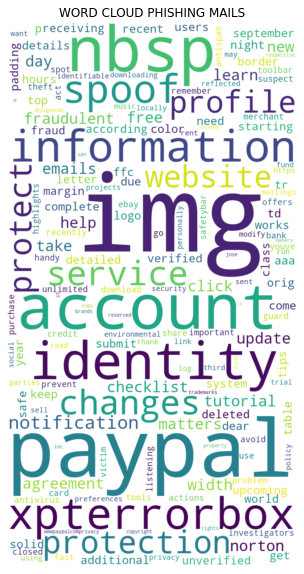

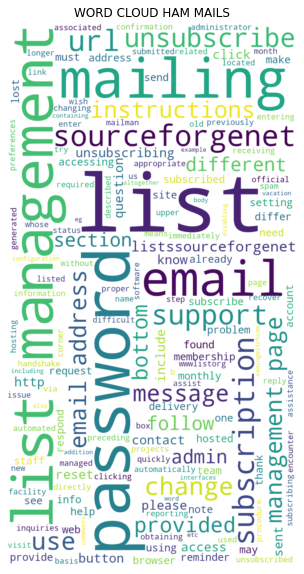

In [40]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import textdistance

  
stop_words = set(stopwords.words('english')) #set of stopwords
 
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r'',cleaned)
    return  cleaned
def filter_words(mails):
    for mail in mails:
        filtered = []
        filtered_text = cleanpunc(cleanhtml(getMailBody(mail)[0]))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
#                     w = lemmatizer.lemmatize(w)
                    filtered.append(w)
    return (filtered)

words_filtered = filter_words(phishing)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stop_words, max_words = 20000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD PHISHING MAILS")
plt.show()


words_filtered = filter_words(ham)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stop_words, max_words = 20000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD HAM MAILS")
plt.show()

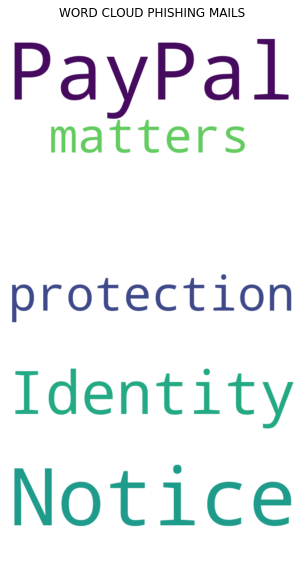

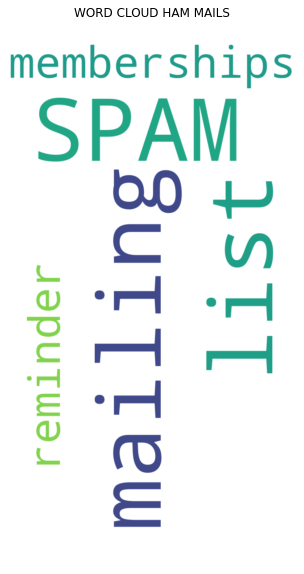

In [41]:
def filter_words(mails):
    for mail in mails:
        filtered = []
        filtered_text = ((getMailBody(mail)[1]))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
#                     w = lemmatizer.lemmatize(w)
                    filtered.append(w)
    return (filtered)

words_filtered = filter_words(phishing)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=42,stopwords=STOPWORDS, max_words = 20000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD PHISHING MAILS")
plt.show()


words_filtered = filter_words(ham)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=42,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD HAM MAILS")
plt.show()

### Mail Features extraction functions

#### Mail body features

In [10]:


def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned



def cleanBody(mail_body):
        filtered = []
        filtered_text = cleanpunc(cleanhtml(mail_body))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
                    filtered.append(w)
        return filtered

def presenceHTML(mail):
    msg = email.message_from_string(mail)
    return int((msg.get_content_type() == 'text/html') == True)
  

def presenceHTMLFORM(message):
    return int((re.compile(r'<\s?\/?\s?form\s?>', re.IGNORECASE).search(message)
             != None) == True)


def presenceHTMLIFRAME(message):
    return int(re.compile(r'<\s?\/?\s?iframe\s?>',
                      re.IGNORECASE).search(message) != None) == True


def presenceJavaScript(message):
    return int(re.compile(r'<\s?\/?\s?script\s?>',
                      re.IGNORECASE).search(message) != None) == True


def presenceFlashContent(message):
    swflinks = re.compile(
        r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])+).*\.swf",
        re.IGNORECASE).findall(message)
    flashObject = re.compile(r'embed\s*src\s*=\s*\".*\.swf\"',
                             re.IGNORECASE).search(message)
    return int((swflinks != None and len(swflinks) > 0) or (flashObject != None)) == True


def presenceGeneralSalutation(message):
    return int(re.compile(GENERAL_SALUTATION,re.IGNORECASE).search(message) != None) == True


def numberOfAttachments(raw_mail):
    try:
        mail = mailparser.parse_from_string(raw_mail)
        count = len(mail.attachments)
        return count
    except:
        return 0

def mail_to(mail_body):
    return int(re.compile(r'mailto:',
                      re.IGNORECASE).search(mail_body) != None) == True

def popups(mail_body):
    if re.compile(r'window.open|onclick',re.IGNORECASE).search(mail_body):
         return 1
    return 0
       
def body_richness(mail_body):
    mail_body = cleanBody(mail_body)
    if len(set(mail_body))!=0:
        return (len(mail_body)/len(set(mail_body)))
    else:
        return len(mail_body)

#### URL features

In [83]:



def isURL(link):
    return re.compile(URLREGEX, re.IGNORECASE).search(link) is not None


def getURLs(mail_body):
    result = []
    cleanPayload = re.sub(r'\s+', ' ', mail_body)
    soup = BeautifulSoup(cleanPayload, 'html.parser')
    links = soup.find_all('a')
    i = 0
    for link in links:
        links[i] = link.get('href')
        i += 1

    for link in links:
        if isinstance(link, str) or isinstance(link, bytes):
            if isURL(link):
                result.append(link)
        else:
            continue

    urlregex = re.compile(URLREGEX_NOT_ALONE, re.IGNORECASE)
    links = urlregex.findall(cleanPayload)

    for link in links:
        if link not in result:
            result.append(link)

    res = list(OrderedDict.fromkeys(result))
    result = list(set(result))
    return result


def IPasURL(urls):
    result = []
    count = 0
    for url in urls:
        if re.compile(IPREGEX, re.IGNORECASE).search(url) and re.compile(IPREGEX, re.IGNORECASE).search(url).group(1) is not None:
            result.append(re.compile(IPREGEX, re.IGNORECASE).search(url).group(1))
            count += 1
    return count


def textLinkDisparity(mail_body):
    count = 0
    soup = BeautifulSoup(mail_body, 'html.parser')
    lists = soup.find_all('a')
    for item in lists:
        link = item.get('href')
        for string in item.stripped_strings:
            text = str(string)
            text = text.strip().replace('\n', '')
            text = text.strip().replace('\t', ' ')
            if isURL(text) and text != link:
                count += 1
    return count


def maliciousURL(urls):
    count = 0
    for url in urls:
        if ((re.compile(IPREGEX, re.IGNORECASE).search(url)
             is not None) == True or (len(re.compile(r'(https?://)',re.IGNORECASE).findall(url)) > 1)
                or (len(re.compile(r'(www.)',re.IGNORECASE).findall(url)) > 1)
                or (len(re.compile(r'(\.com|\.org|\.co)',re.IGNORECASE).findall(url)) > 1))== True:
            count += 1
    return count


def hexadecimalURL(urls):
    count = 0
    for url in urls:
        if ((re.compile(r'%[0-9a-fA-F]+', re.IGNORECASE).search(url)
             is not None) == True):
            count += 1
    return count


def getAlexaRank(domain):
    if domain in alexa_rank_cache:
#         cache_hit +=1
        return int(alexa_rank_cache[domain])
#     else:
#         cache_miss += 1
    try:
        xml = urllib.request.urlopen(
            'http://data.alexa.com/data?cli=10&dat=s&url=%s' %
            domain).read().decode('utf-8')
    except:
        alexa_rank_cache[domain] = 0
        return 0
    try:
        rank = (re.compile(r'RANK="(\d+)"',re.IGNORECASE).findall(xml))[1]
    except:
        rank = -1
    alexa_rank_cache[domain] = rank
    return int(rank)


def extractDomains(urls):
    domain_set = set()
    for url in urls:
        domain = tldextract.extract(url).registered_domain
        if domain not in domain_set:
            domain_set.add(domain)
        else:
            continue

    return list(domain_set)


def domainCounts(url):
    domains = tldextract.extract(url)
    count = (len(re.compile(r'\.',re.IGNORECASE).findall( domains.subdomain))) + \
        ((len(re.compile(r'\.',re.IGNORECASE).findall( domains.domain)))+1)
    if re.compile(IPREGEX,re.IGNORECASE).search(domains.domain) is not None:
        count -= 3
    return (count)


def presenceBadRankedURL(urls):
    domains = extractDomains(urls)
    max_rank = 0
    for domain in domains:
        rank = getAlexaRank(domain)
        max_rank = max(rank, max_rank)
        if rank == -1:
            return 0
    if max_rank > 70000:
        return 1
    return 0

def maxDomainsCounts(urls):
    count = 1
    for url in urls:
        count = max(domainCounts(url), count)
    return count

def at_in_url(urls):
    for url in urls:
        if (re.compile(r'@',re.IGNORECASE).search(url)):
            return 1
        else: 
            continue
    return 0
import json
import ast
def writeCache():
    with open('./cache/alexa_rank_cache.txt', 'w') as cache_file:
        cache_file.write(json.dumps(alexa_rank_cache))
        logger.info("Cache written")
        

def loadCache():
    try:
        with open('./cache/alexa_rank_cache.txt','r') as cache_file:
            cache = ast.literal_eval(cache_file.read())
            alexa_rank_cache = cache
            logger.info("Cache loaded")
    except FileNotFoundError:
        log.warning("No alexa rank cache found")


#### Subject line features

In [80]:


def isRepliedMail(subject):
    return (subject).startswith('Re:')

def isForwardedMail(subject):
    return (subject).startswith('Fwd:')

def subject_richness(subject):
    texts = subject.split()
    if len(set(texts))!=0:
        return (len(texts)/len(set(texts)))
    else:
        return len(texts)
def contains_verify(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('verify',w)) >0.9:
            return 1
     return 0

def contains_update(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('update',w)) >0.9:
            return 1
     return 0

def contains_access(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('access',w)) >0.9:
            return 1
     return 0
# def get_top_n_words(corpus, n=None):
#     filtered = []
#     for word in corpus:
#         word = stemmer.stem(word)
#         word = lemmatizer.lemmatize(word)
#         filtered+=word
#     corpus = set(filtered)
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

# body = ""
# for mail in phishing:
#     body += getMailBody(mail)[0]
#     body+=" "
# print(get_top_n_words(body))
def contains_prime_targets(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if ((jaro('bank',w)) >0.9 or (jaro('Paypal',w)) >0.9 or (jaro('ebay',w)) >0.9 or (jaro('amazon',w)) >0.9):
            return 1
     return 0

def contains_account(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('account',w)) >0.9 or jaro('profile',w) >0.9 or jaro('handle',w) >0.9 :
            return 1
     return 0
    
def contains_suspended(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (((jaro('closed',w)) or jaro('expiration',w))or jaro('suspended',w)) >0.9 or jaro('terminate',w) >0.9 or jaro('restricted',w) >0.9:
            return 1
     return 0

def contains_password(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('password',w)) >0.9 or jaro('credential',w) > 0.9:
            return 1
     return 0

def contains_urgent(subject):
    subject = purify(subject)
    jaro = textdistance.Jaro()
    for w in subject.split():
        if (jaro('urgent',w)) >0.9 or jaro('immediate',w) >0.9:
           return 1
    return 0

def purify(subject):
    filtered = ""
    word_tokens = word_tokenize(subject)
    for w in word_tokens:
         if w not in stop_words and w.isalpha():
                   w = stemmer.stem(w)
                   filtered+=(lemmatizer.lemmatize(w))
                   filtered+=" "
    return filtered


#### Sender's address features

In [81]:
def number_of_dots(headers):
        try:
            sender = headers["From"]
        except KeyError as Argument:
            sender = headers["from"]
        return len(re.compile(r'\.',re.IGNORECASE).findall(sender))
def number_of_dash(headers):
        try:
            sender = headers["From"]
        except KeyError as Argument:
            sender = headers["from"]
        return len(re.compile(r'\-',re.IGNORECASE).findall(sender))
   

### Constructing dataset by extracting features

In [83]:
filename = "./dataset/mails_dataset.csv"
fields = [
     "HTML", "HTMLForm", "IFrame", "FlashContent", "General Salutation",
    "Javascript", "mailto:","popups","body richness","Number of URLs", "Malicious URL", "text link disparity",
    "Attachments", "IP URLs", "hexadecimal URL", "Bad Rank Domain",
    "Maximum Domains Counts","@_in_url","Subject richness","Fwd: mail","Re: mail","contains account","contains verify",
    "contains update","contains prime targets","contains suspension","contains password","contains urgent","contains access",
    "number of dots","number of dash","Class"
]
rows = []


def constructDataSet(messages, label):
    i = 1
    
    for mail in messages:
        parsed_mail = getMailBody(mail)
        
        mail_body = parsed_mail[0]
        mail_subject = parsed_mail[1]
        mail_headers = parsed_mail[2]
        
        urls = getURLs(mail_body)
        feature = [0] * (len(fields))
        i = 0
        feature[i]= int(presenceHTML(mail)==True)
        i+=1
        feature[i]= int(presenceHTMLFORM(mail_body)==True)
        i+=1
        feature[i]= int(presenceHTMLIFRAME(mail_body)==True)
        i+=1
        feature[i]= int(presenceFlashContent(mail_body)==True)
        i+=1
        feature[i]= int(presenceGeneralSalutation(mail_body)==True)
        i+=1
        feature[i]= int(presenceJavaScript(mail_body)==True)
        i+=1
        feature[i]= int(mail_to(mail_body)==True)
        i+=1
        feature[i]= popups(mail_body)
        i+=1
        feature[i] = body_richness(mail_body)
        i+=1
        feature[i]= len(urls)
        i+=1
        feature[i]= (maliciousURL(urls))
        i+=1
        feature[i]= textLinkDisparity(mail_body)
        i+=1
        feature[i] = numberOfAttachments(mail)
        i+=1
        feature[i] = (IPasURL(urls))
        i+=1
        feature[i] = (hexadecimalURL(urls))
        i+=1
        feature[i] = int(presenceBadRankedURL(urls)==True)
        i+=1
        feature[i] = (maxDomainsCounts(urls))
        i+=1
        feature[i]= at_in_url(urls)
        i+=1
        feature[i] = subject_richness(mail_subject)
        i+=1
        feature[i]= int(isForwardedMail(mail_subject)==True)
        i+=1
        feature[i]= int(isRepliedMail(mail_subject)==True)
        i+=1
        feature[i]= int(contains_account(mail_subject)== True)
        i+=1
        feature[i]= int(contains_verify(mail_subject)==True)
        i+=1
        feature[i]= int(contains_update(mail_subject)==True)
        i+=1
        feature[i]= int(contains_prime_targets(mail_subject)==True)
        i+=1
        feature[i]= int(contains_suspended(mail_subject)==True)
        i+=1
        feature[i]= int(contains_password(mail_subject)==True)
        i+=1
        feature[i]= int(contains_urgent(mail_subject)==True)
        i+=1
        feature[i] = int(contains_access(mail_subject)==True)
        i+=1
        feature[i]= number_of_dots(mail_headers)
        i+=1
        feature[i]= number_of_dash(mail_headers)
        i+=1
        feature[i] = label
        rows.append(feature)

In [198]:
def writeCSV():
    with open(filename, 'w', newline='') as csvfile:
        
        # creating a csv writer object
        csvwriter = csv.writer(csvfile)

        # writing the fields
        csvwriter.writerow(fields)

        # writing the data rows
        csvwriter.writerows(rows)
        logger.info("CSV written to %s",filename)
        print("written CSV")

In [84]:
rows.clear()
loadCache()
logger.debug("Started Constructing Dataset for Ham mail")
print("HAM MAILS")
constructDataSet(ham, "Ham")
# print(rows)
print("PHISHING MAILS")
logger.debug("Started Constructing Dataset for Phishing mail")
constructDataSet(phishing, "Phishing")
writeCSV()
writeCache()

HAM MAILS
PHISHING MAILS
written CSV


In [236]:
mails = pd.read_csv("./dataset/mails_dataset.csv")
print("Number of Ham class records: ",len(mails[mails['Class'] == 'Ham']))
print("Number of Phishing class records: ",len(mails[mails['Class'] == 'Phishing']))

Number of Ham class records:  1631
Number of Phishing class records:  1631


## Split Training and Testing data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()
mails = pd.read_csv("./dataset/mails_dataset.csv")

labels=le.fit_transform(mails['Class'])

mails.drop('Class',axis =1,inplace=True)



X_train, X_test, Y_train, Y_test = train_test_split(mails,
                                                    labels,
                                                    test_size=0.20,
                                                    stratify=labels,
                                                    random_state=42)
# check dataset shapes
print(X_train.shape, (Y_train).shape)


(2609, 31) (2609,)


## Exploratory Data Analysis

### Checking dataset 

In [2]:
mails = X_train.copy(deep=True)
mails['Class'] =  pd.Series(Y_train, index=mails.index)

mails.describe()

,HTML,HTMLForm,IFrame,FlashContent,General Salutation,Javascript,mailto:,popups,body richness,Number of URLs,...,contains verify,contains update,contains prime targets,contains suspension,contains password,contains urgent,contains access,number of dots,number of dash,Class
count,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,...,2609.000000,2609.000000,2609.000000,2609.000000,2609.00000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000
mean,0.284017,0.041778,0.021464,0.001150,0.100422,0.043695,0.073208,0.031430,1.557759,9.200460,...,0.008049,0.065926,0.183212,0.000767,0.00230,0.023764,0.038712,1.685703,0.203910,0.500192
std,0.451031,0.200121,0.144953,0.033897,0.300619,0.204455,0.260528,0.174509,0.753516,63.304485,...,0.089372,0.248200,0.386914,0.027682,0.04791,0.152342,0.192945,1.026541,0.492085,0.500096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.215686,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.387387,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.250000,3117.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,9.000000,7.000000,1.000000


In [360]:
#checking for missing values
# print(mails.isnull().sum())
mails.drop_duplicates(keep = "first", inplace = True)
print("Number of Ham class records: ",len(mails[mails['Class'] == 0]))
print("Number of Phishing class records: ",len(mails[mails['Class'] == 1]))
labels = mails['Class']
mails.drop('Class',axis=1,inplace=True)
mails.tail()

,HTML,HTMLForm,IFrame,FlashContent,General Salutation,Javascript,mailto:,popups,body richness,Number of URLs,...,contains account,contains verify,contains update,contains prime targets,contains suspension,contains password,contains urgent,contains access,number of dots,number of dash
1985,1,0,0,0,0,0,0,1,1.787879,15,...,0,0,0,1,0,0,0,0,1,0
2997,1,0,0,0,0,0,0,0,1.312500,4,...,0,0,0,1,0,0,0,0,2,2
518,0,0,0,0,0,0,0,0,1.189189,2,...,0,0,0,0,0,0,0,0,2,0
2778,0,0,0,0,0,0,0,0,1.584615,2,...,0,0,0,0,0,0,0,0,3,0
1419,0,0,0,0,0,0,0,0,1.296296,1,...,0,0,0,0,0,0,0,0,1,1


### Heatmap

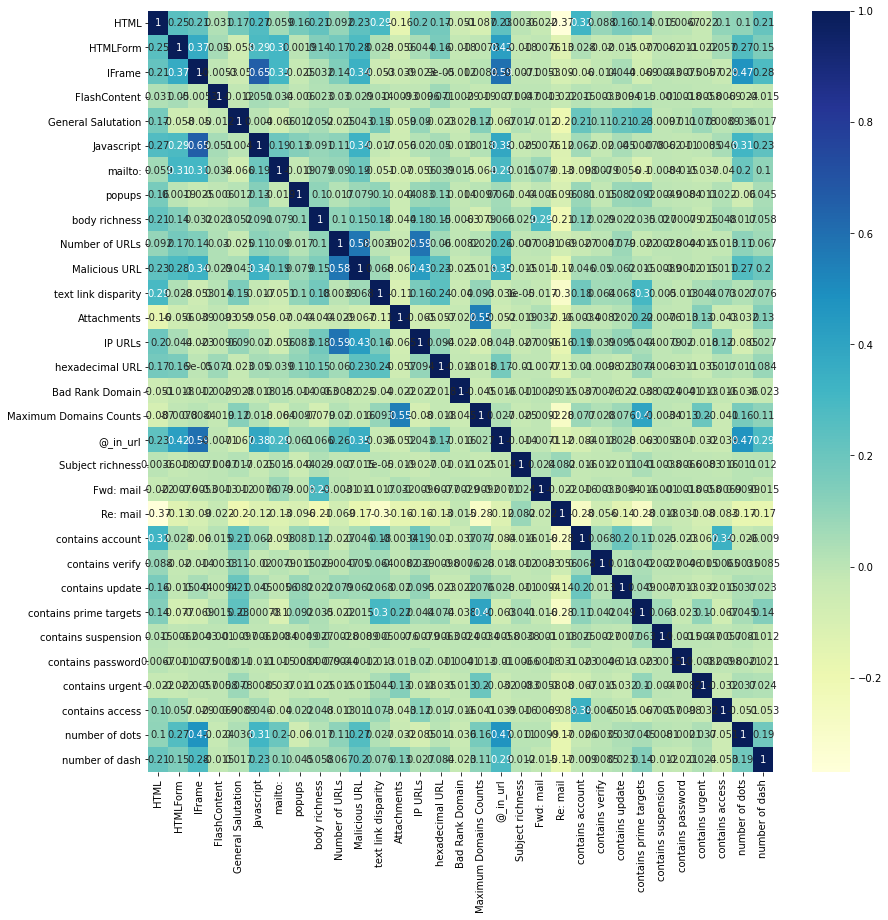

In [244]:
%matplotlib inline
plt.figure(figsize = (14,14))
sns.heatmap(mails.corr(),annot=True,cmap="YlGnBu")


As I can interpret from the heatmap shown in Figure 12, there is no such very strong correlation between features but I have decent correlation between:
- JavaScript and Iframe
- Iframe and @_in_url
- Text link disparity and maximum domains counts
- IP URLs and Number of URLs
- Malicious URL and Number of URLs <br>
These correlations are quite obvious trend revealed in the heatmap. As number of URLs increases the mail tend to be more malicious and have IP URLs. It also reveals that if a mail has many domains it is much likely to have text link disparity.

### Visualization: Matplotlib

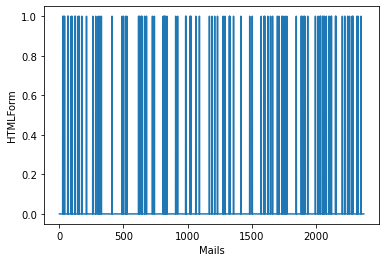

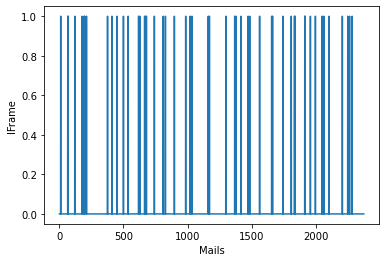

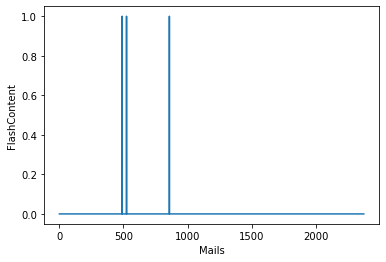

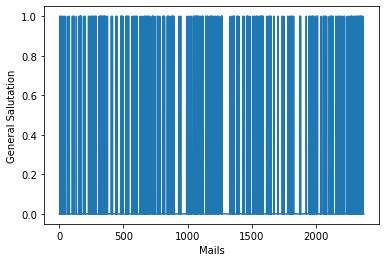

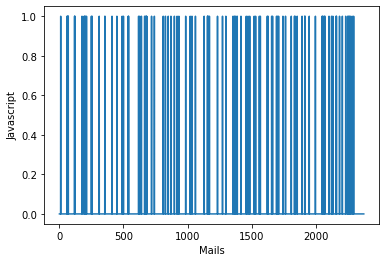

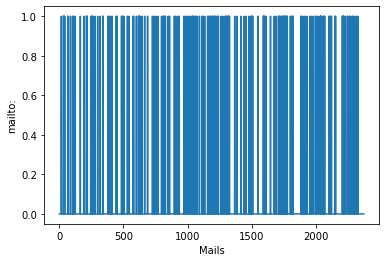

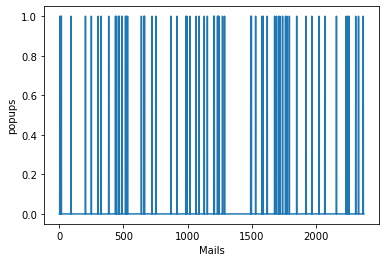

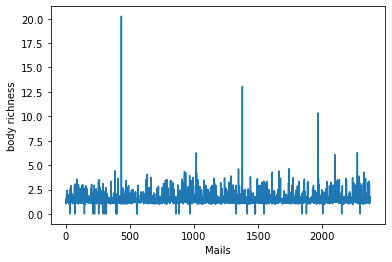

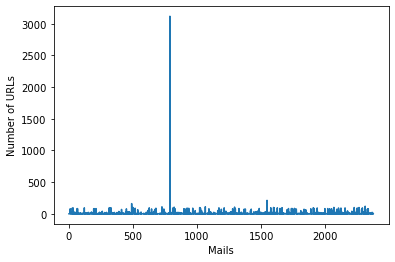

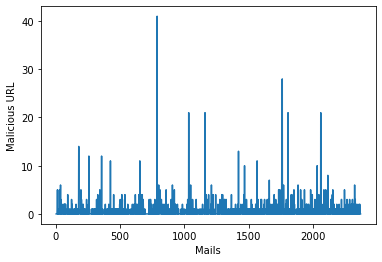

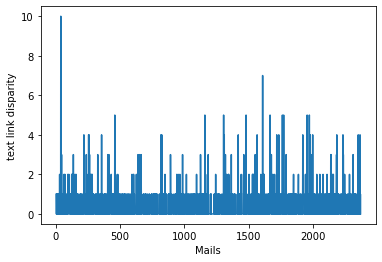

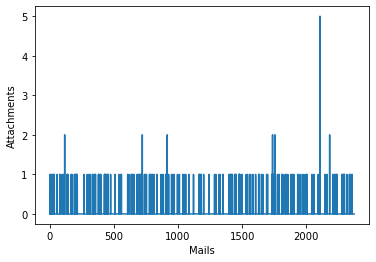

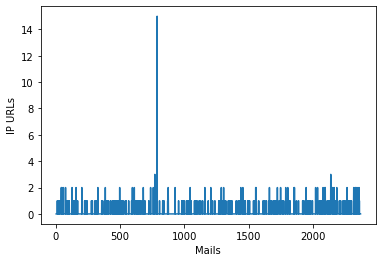

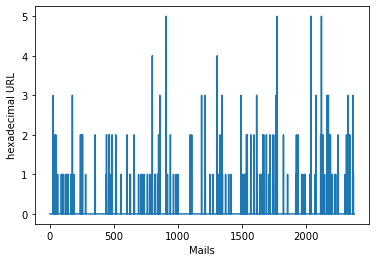

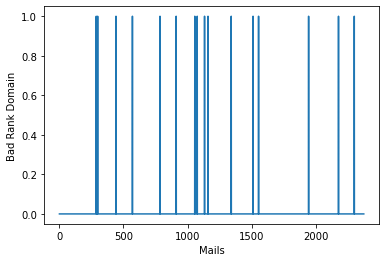

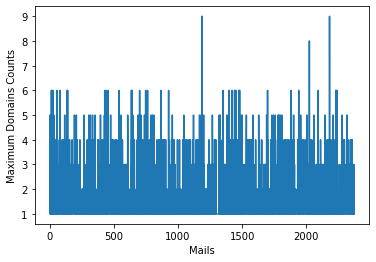

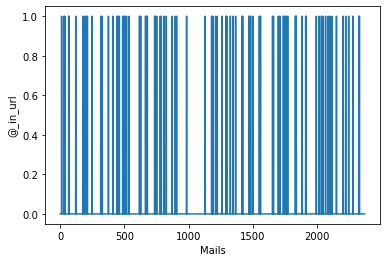

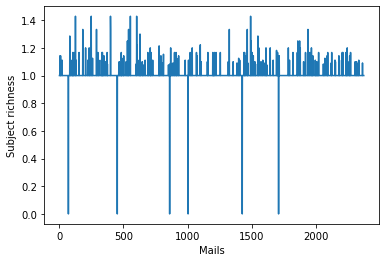

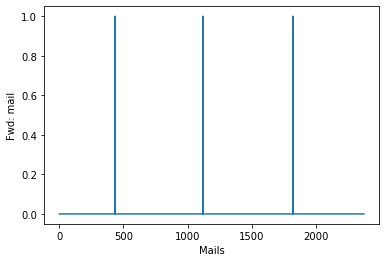

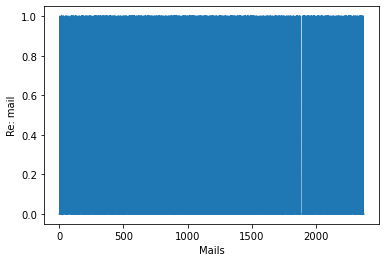

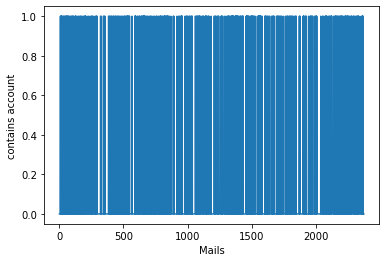

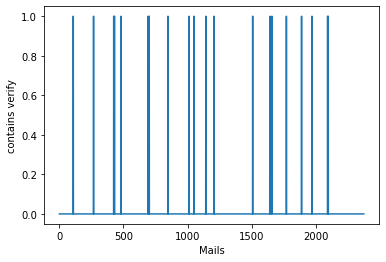

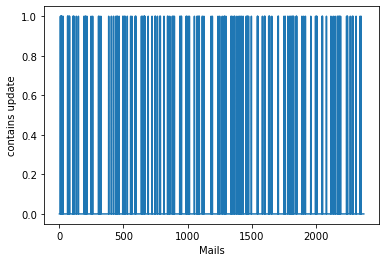

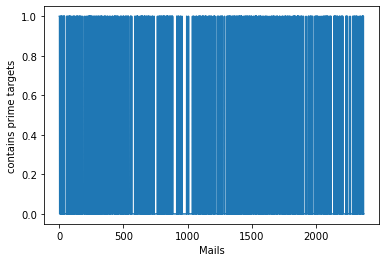

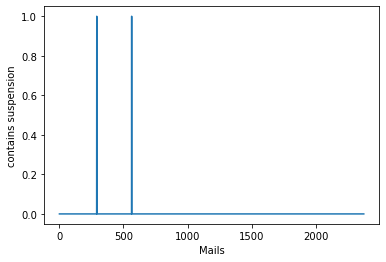

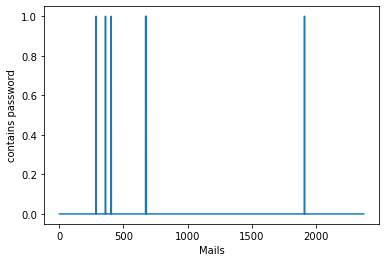

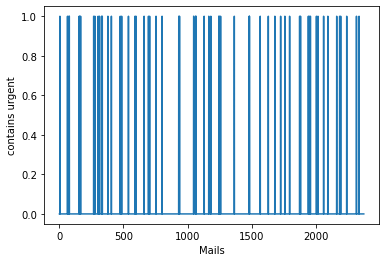

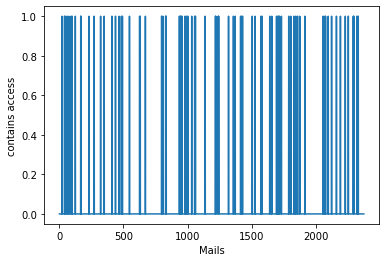

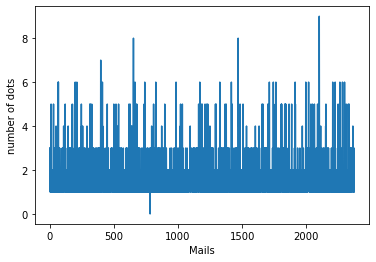

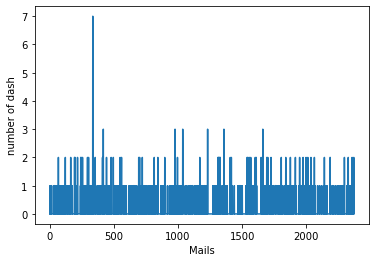

In [340]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_data():
        feature_val = np.array(mails).T
        fields = mails.columns
        xpoints = np.arange(1,len(mails)+1,1)
        for i in range(1,len(fields),1):
            ypoints = np.array(feature_val[i])
            plt.ylabel(fields[i]) 
            
            plt.xlabel("Mails")
            plt.plot(xpoints, ypoints)
            plt.show()
        
visualize_data()
logger.debug("Matplotlib visualization done")

### Principal Component Analysis

#### PCA for visualization

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

data = mails.copy(deep=True)






In [246]:
# initializing the pca
from sklearn import decomposition
import seaborn as sn
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)

data  = standardized_data
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_model = pca.fit_transform(data)

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_model.T, labels)).T


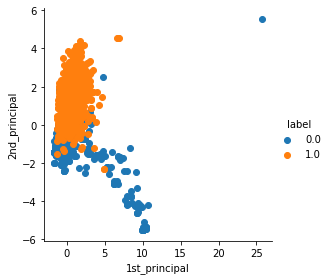

Plotted PCA with components = 2


In [247]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=4).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
print("Plotted PCA with components =",pca.n_components)

# logger.debug("Plotted PCA with components = ",pca.n_components)


Here, I can see that clusters are forming which means there is a separation between the both classes but I can also see the green points which represent mixing presence of both classes and it means often time phishing mail are most like the ham mails.

(2609, 31)


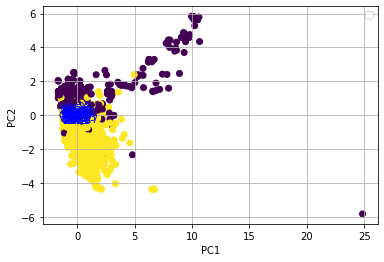

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#In general it is a good idea to scale the data
scaler = StandardScaler()
X =  X_train.copy(deep=True)
y = Y_train.copy()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)   
print(x_new.shape)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.legend()
plt.grid()

#Call the function. 
myplot(x_new[:,0:3], pca.components_) 
plt.show()

In [249]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


model = PCA(n_components=4).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_train.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,Number of URLs
1,PC1,Malicious URL
2,PC2,Maximum Domains Counts
3,PC3,number of dots


#### PCA for dimentionality reduction

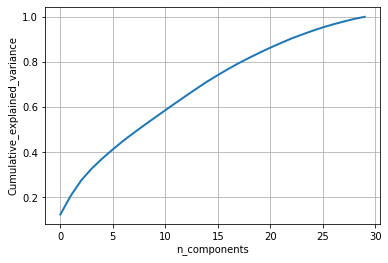

In [250]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = len(mails.columns)-1
pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
logger.debug("Cumulative explained variance graph plotted")


As we can see from the graph, if we take 22 features we are preserving around 90% variance.

### t-SNE using Scikit-Learn

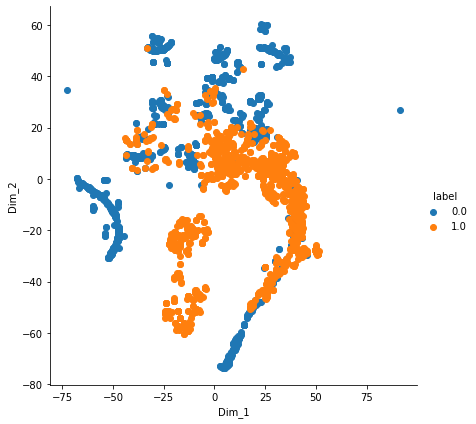

In [251]:
# TSNE

from sklearn.manifold import TSNE


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(X_train)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("t-SNE with default configurations plotted")

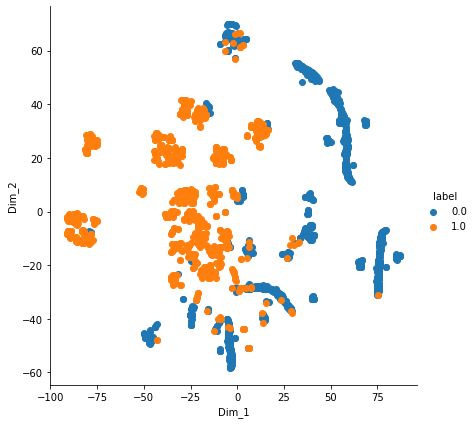

In [260]:
model = TSNE(n_components=2, random_state=0, perplexity=35,  n_iter=3500)

tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("t-SNE with perplexity = 50 and steps = 5000")

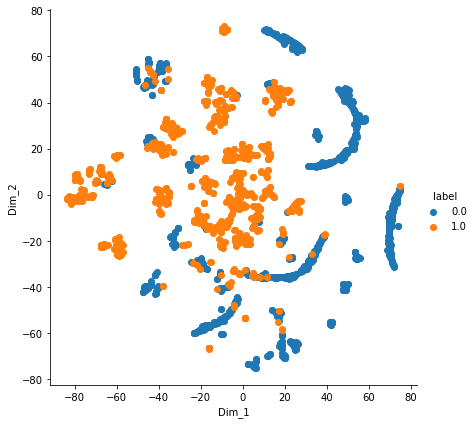

In [256]:
model = TSNE(n_components=2, random_state=0, perplexity=20)
tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("t-SNE with perplexity = 50 and steps = 1000")

This is the best t-SNE visualization we get by running t-SNE at perplexit = 35 and number of iteration = 3500. We can see a phishing mails cluster forming in orange color along with that we see several outliers which shows how phishing mails are so close to the ham mails

### Single Value Decomposition

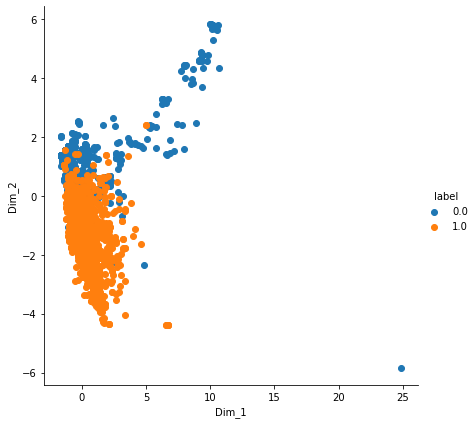

In [537]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd_data = svd.fit_transform(data)

svd_data = np.vstack((svd_data.T, labels)).T
svd_df = pd.DataFrame(data=svd_data, columns=("Dim_1", "Dim_2", "label"))
palette =(zip(svd_data, sns.color_palette()))

palette = sns.color_palette()
sn.FacetGrid(svd_df, hue="label",palette=palette, size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("SVD with default configurations plotted")

PCA with SVD also shows the formation of cluster of phishing mail which also overlaps many hams mails as it covers that variance in features too.

### Feature Selection

In [5]:
## Remove features with missing values
X_train.isnull().any().any()

False

#### Variance Filter

In [6]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.16))
sel.fit(X_train)
cols = sel.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
Selected_features_VarianceFilter = features_df_new.columns
Selected_features_VarianceFilter

Index(['HTML', 'body richness', 'Number of URLs', 'Malicious URL',
       'text link disparity', 'IP URLs', 'hexadecimal URL',
       'Maximum Domains Counts', 'Re: mail', 'number of dots',
       'number of dash'],
      dtype='object')

In [7]:
Filtered = X_train[Selected_features_VarianceFilter]

#### Feature Importance with Random Forest Regressor

In [8]:
from sklearn.ensemble import RandomForestRegressor
X_trainn = Filtered
model = RandomForestClassifier(random_state=42, max_depth=10)
model.fit(X_trainn,Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

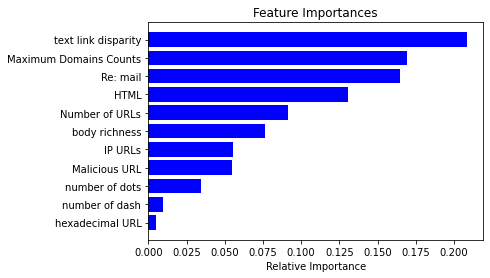

['text link disparity',
 'Maximum Domains Counts',
 'Re: mail',
 'HTML',
 'Number of URLs',
 'body richness',
 'IP URLs',
 'Malicious URL',
 'number of dots',
 'number of dash',
 'hexadecimal URL']

In [9]:
features = X_trainn.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-13:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Selected_features_RandomForestClassifier = [features[index] for index in indices]
Selected_features_RandomForestClassifier.reverse()
Selected_features_RandomForestClassifier

#### Univariate using SelectKBest

In [10]:
#UNIVARIATE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = X_train, Y_train
selector = SelectKBest(chi2, k=11)
selector.fit(X,y)
# sel.scores_
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
Selected_features_Univariate = features_df_new.columns
Selected_features_Univariate 

Index(['HTML', 'General Salutation', 'Number of URLs', 'text link disparity',
       'Attachments', 'IP URLs', 'hexadecimal URL', 'Maximum Domains Counts',
       'Re: mail', 'contains account', 'contains prime targets'],
      dtype='object')

UNION ALL SELECTED CANDIDATES

In [11]:
# Selected_features = ((Selected_features_RandomForestClassifier + Selected_features_Univariate) + Selected_features_VarianceFilter)
# # len(set(Selected_features))
Selected_features = []
Selected_features.extend(Selected_features_RandomForestClassifier) 
Selected_features.extend(Selected_features_Univariate)
Selected_features.extend(Selected_features_VarianceFilter)
Selected_features = set(Selected_features)
Selected_features

{'Attachments',
 'General Salutation',
 'HTML',
 'IP URLs',
 'Malicious URL',
 'Maximum Domains Counts',
 'Number of URLs',
 'Re: mail',
 'body richness',
 'contains account',
 'contains prime targets',
 'hexadecimal URL',
 'number of dash',
 'number of dots',
 'text link disparity'}

#### High Correlation Filter

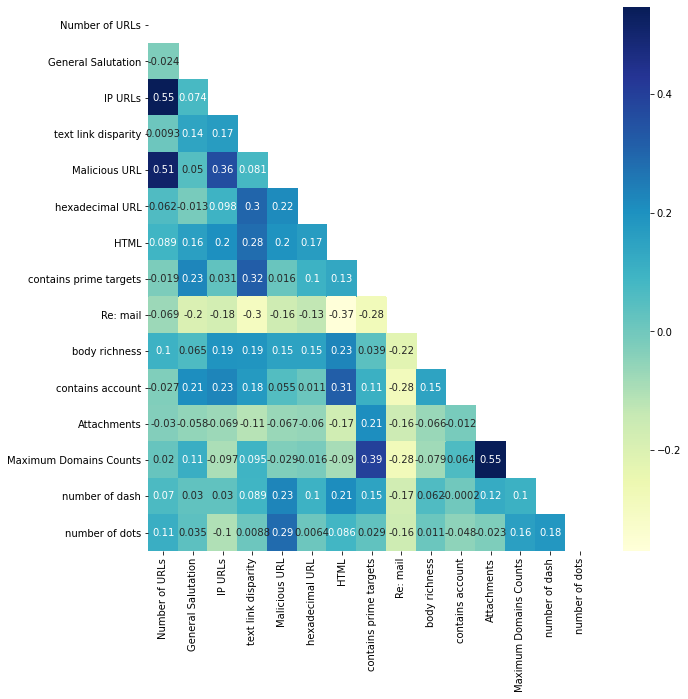

In [62]:
Filtered = X_train[Selected_features]
plt.figure(figsize = (10,10))
# creating mask
mask = np.triu(np.ones_like(Filtered.corr()))
  

sns.heatmap(Filtered.corr(),annot=True,cmap="YlGnBu", mask=mask)


In [18]:
Selected_features

{'Attachments',
 'General Salutation',
 'HTML',
 'IP URLs',
 'Malicious URL',
 'Maximum Domains Counts',
 'Number of URLs',
 'Re: mail',
 'body richness',
 'contains account',
 'contains prime targets',
 'hexadecimal URL',
 'number of dash',
 'number of dots',
 'text link disparity'}

This reveals that there is decent correlation between
- Number of URLs and IP URLs
- Maximum Domain Counts and Attachments
- Number of URLs and Malicious URLs
<br>We as until now I have 15 features and sacrificing 3 features would be not much beneficial, we will preserve this information.

Finally,we have all the **15 features selected for next phase i.e. model building.**

## Selecting Best Classifiers

In [3]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef,roc_auc_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


In [12]:
X_train = X_train[Selected_features]
X_test = X_test[Selected_features]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
def training_and_cross_validation(model):
    
    X = X_train
    y = Y_train

    skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

    accuracy_list = []
    conf_matrix_list = []

    for train_index, test_index in skf.split(X, y):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
    
        Xtrain = sc.fit_transform(Xtrain)
        Xtest = sc.transform(Xtest)
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        accuracy = accuracy_score(ytest, predictions)
        accuracy_list.append(accuracy)
        CM=confusion_matrix(ytest, predictions)
        conf_matrix_list.append(CM)

    avg_conf_matrix = np.array((pd.DataFrame(np.ceil(np.mean(conf_matrix_list, axis=0)))).astype(int))

    labels =['Ham','Phishing']

    fig, ax = plot_confusion_matrix(conf_mat=avg_conf_matrix,figsize=(4,4),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.title("Average Confusion Matrix after 10 fold validation ")
#     plt.show()
    print('\n')
    mean_accuracy = np.mean(accuracy_list)
    print("Total Average Accuracy is ",np.round(mean_accuracy*100,4),"%")
    return model

In [14]:
MCC = {}
LOG_LOSS = {}
BALANCED_ACCURACY = {}
ACCURACY = {}
F1 = {}
ROC_AUC = {}
REPORT = {}
MODEL = []

In [15]:

def show_performance_metrics(model,name,Xtest=X_test):
    predictions = model.predict(Xtest)
    
    
    if name == 'Voting Classifier(hard voting)':
            ll = 'N/A'
    else:
        train_predictions = model.predict_proba(Xtest)
        ll = log_loss(Y_test, train_predictions)
        ll = np.round((ll),3)
    
    
    report = classification_report(Y_test, predictions,labels=[0,1],digits=4)
    mcc = np.round(matthews_corrcoef(Y_test,predictions),3)
    
    roc_auc = np.round(roc_auc_score(Y_test, predictions)*100,3)
    accuracy = np.round(accuracy_score(Y_test, predictions)*100,3)
    balanced_accuracy = np.round(balanced_accuracy_score(Y_test, predictions)*100,3)
    f1 = np.round(f1_score(Y_test, predictions)*100,3)
    MCC[name] = mcc
    LOG_LOSS[name] = ll
    BALANCED_ACCURACY[name] = balanced_accuracy
    ACCURACY[name] = accuracy
    F1[name] = f1
    ROC_AUC[name] = roc_auc
    REPORT[name] = report
    labels = ["Ham","Phishing"]
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y_test,predictions),figsize=(4,4),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    title = "Confusion Matrix : "+name
    plt.title(title)
    plt.show()    
    print(report)
    print("MCC: ",mcc)    
    print("Log Loss: ",ll)
    print('f1: ',f1)
    print('Balanced Accuracy: ',balanced_accuracy)
    print('Accuracy: ',accuracy)
    print('ROC_AUC : ', roc_auc)

In [87]:
# Libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [88]:
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=10)
MODEL=[]

I have selected best five classifiers out of 11 classifiers as stated in previous section. I went ahead with using cross validation score to select best five classifiers which would be fine-tuned in later stage. As the dataset is slightly imbalanced I have selected f1 score as scoring for cross validation score

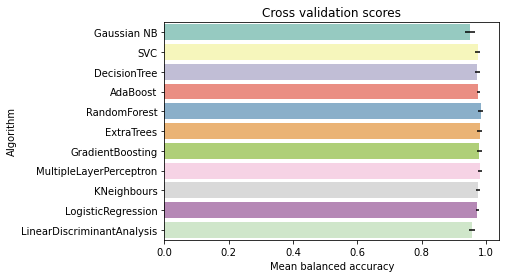

In [90]:
# Test all the above stated algorithms
random_state = 2
classifiers = []
classifiers.append(GaussianNB())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "balanced_accuracy", cv = kfold, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Gaussian NB","SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighbours","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean balanced accuracy")
g = g.set_title("Cross validation scores")

After observing mean f1 score and mean error, it is decided to select following five models for hyperparameter tuning.
- SVC
- Logistic Regression
- Random Forest Classifier
- ExtraTrees Classifier
- Gradient Boosting


## Machine Learning Models

### Logistic Regression



Total Average Accuracy is  97.2784 %


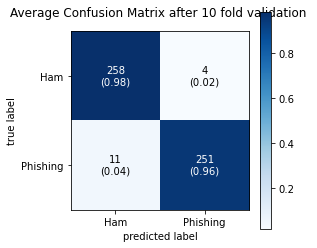

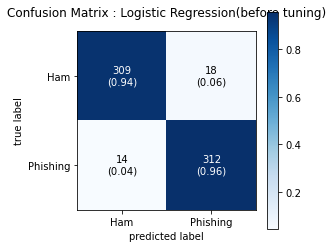

              precision    recall  f1-score   support

           0     0.9567    0.9450    0.9508       327
           1     0.9455    0.9571    0.9512       326

    accuracy                         0.9510       653
   macro avg     0.9511    0.9510    0.9510       653
weighted avg     0.9511    0.9510    0.9510       653

MCC:  0.902
Log Loss:  0.205
f1:  95.122
Balanced Accuracy:  95.1
Accuracy:  95.1
ROC_AUC :  95.1


In [43]:
lr = LogisticRegression()
lr = training_and_cross_validation(lr)
MODEL.append("Logistic Regression(before tuning)")
show_performance_metrics(lr,MODEL[-1])

### SVC



Total Average Accuracy is  97.3934 %


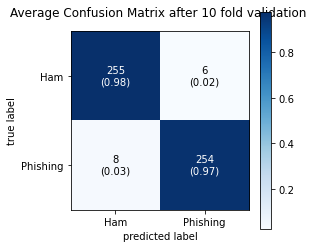

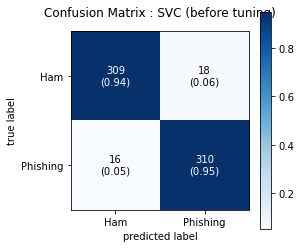

              precision    recall  f1-score   support

           0     0.9508    0.9450    0.9479       327
           1     0.9451    0.9509    0.9480       326

    accuracy                         0.9479       653
   macro avg     0.9479    0.9479    0.9479       653
weighted avg     0.9479    0.9479    0.9479       653

MCC:  0.896
Log Loss:  0.139
f1:  94.801
Balanced Accuracy:  94.794
Accuracy:  94.793
ROC_AUC :  94.794


In [45]:
svc = SVC(probability=True)
svc = training_and_cross_validation(svc)
MODEL.append('SVC (before tuning)')
show_performance_metrics(svc,MODEL[-1])

### Gradient Boosting



Total Average Accuracy is  97.8918 %


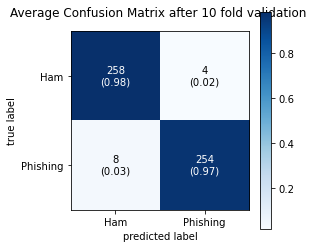

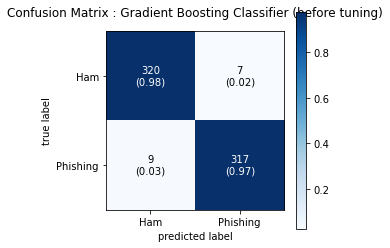

              precision    recall  f1-score   support

           0     0.9726    0.9786    0.9756       327
           1     0.9784    0.9724    0.9754       326

    accuracy                         0.9755       653
   macro avg     0.9755    0.9755    0.9755       653
weighted avg     0.9755    0.9755    0.9755       653

MCC:  0.951
Log Loss:  0.093
f1:  97.538
Balanced Accuracy:  97.549
Accuracy:  97.55
ROC_AUC :  97.549


In [47]:
gbc = GradientBoostingClassifier()
gbc = training_and_cross_validation(gbc)
MODEL.append('Gradient Boosting Classifier (before tuning)')
show_performance_metrics(gbc,MODEL[-1])

### ExtraTrees Classifier



Total Average Accuracy is  97.7387 %


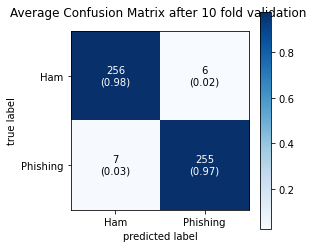

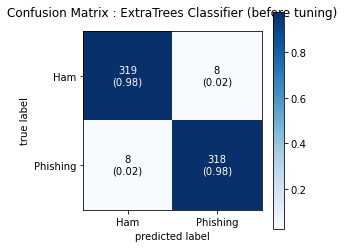

              precision    recall  f1-score   support

           0     0.9755    0.9755    0.9755       327
           1     0.9755    0.9755    0.9755       326

    accuracy                         0.9755       653
   macro avg     0.9755    0.9755    0.9755       653
weighted avg     0.9755    0.9755    0.9755       653

MCC:  0.951
Log Loss:  0.092
f1:  97.546
Balanced Accuracy:  97.55
Accuracy:  97.55
ROC_AUC :  97.55


In [49]:
extc = ExtraTreesClassifier()
extc = training_and_cross_validation(extc)
MODEL.append('ExtraTrees Classifier (before tuning)')
show_performance_metrics(extc,MODEL[-1])

### Random Forest Classifier



Total Average Accuracy is  97.9685 %


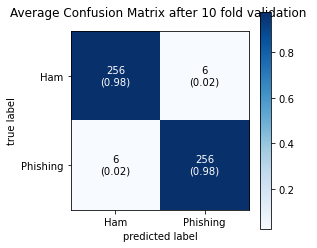

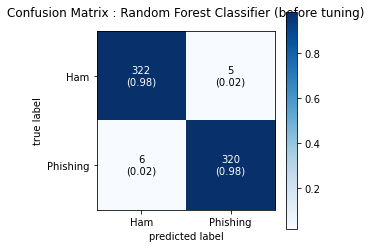

              precision    recall  f1-score   support

           0     0.9817    0.9847    0.9832       327
           1     0.9846    0.9816    0.9831       326

    accuracy                         0.9832       653
   macro avg     0.9832    0.9832    0.9832       653
weighted avg     0.9832    0.9832    0.9832       653

MCC:  0.966
Log Loss:  0.143
f1:  98.31
Balanced Accuracy:  98.315
Accuracy:  98.315
ROC_AUC :  98.315


In [51]:
rf_c = RandomForestClassifier()
rf_c  = training_and_cross_validation(rf_c )
MODEL.append('Random Forest Classifier (before tuning)')
show_performance_metrics(rf_c,MODEL[-1])

## Fine tuning selected models

In [67]:
kfold = 10

### ExtraTrees Classifier

In [68]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="balanced_accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   38.3s finished


0.9831327069876687

ExtraTreesClassifier(max_features=1, min_samples_split=10, n_estimators=300)


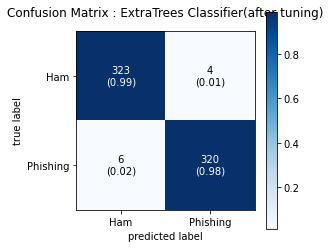

              precision    recall  f1-score   support

           0     0.9818    0.9878    0.9848       327
           1     0.9877    0.9816    0.9846       326

    accuracy                         0.9847       653
   macro avg     0.9847    0.9847    0.9847       653
weighted avg     0.9847    0.9847    0.9847       653

MCC:  0.969
Log Loss:  0.071
f1:  98.462
Balanced Accuracy:  98.468
Accuracy:  98.469
ROC_AUC :  98.468


In [50]:
MODEL.append("ExtraTrees Classifier(after tuning)")
print(ExtC_best)
show_performance_metrics(gsExtC,MODEL[-1],X_test)

### Random Forest Classifier

In [69]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini","entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   51.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.4min finished


0.9831388152077809

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=3,
                       min_samples_leaf=3)


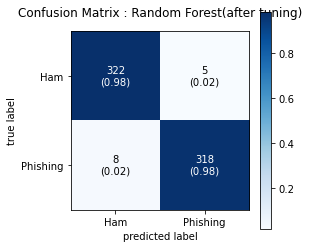

              precision    recall  f1-score   support

           0     0.9758    0.9847    0.9802       327
           1     0.9845    0.9755    0.9800       326

    accuracy                         0.9801       653
   macro avg     0.9801    0.9801    0.9801       653
weighted avg     0.9801    0.9801    0.9801       653

MCC:  0.96
Log Loss:  0.067
f1:  97.997
Balanced Accuracy:  98.008
Accuracy:  98.009
ROC_AUC :  98.008


In [76]:
# MODEL.append("Random Forest(after tuning)")
print(RFC_best)
show_performance_metrics(gsRFC,"Random Forest(after tuning)",X_test)

### Gradient Boosting

In [70]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   21.7s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   42.3s finished


0.9823695844385499

GradientBoostingClassifier(max_depth=8, max_features=0.1, min_samples_leaf=100,
                           n_estimators=300)


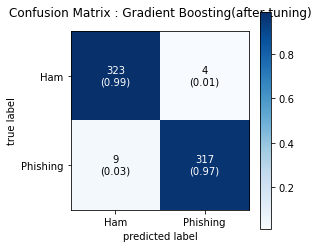

              precision    recall  f1-score   support

           0     0.9729    0.9878    0.9803       327
           1     0.9875    0.9724    0.9799       326

    accuracy                         0.9801       653
   macro avg     0.9802    0.9801    0.9801       653
weighted avg     0.9802    0.9801    0.9801       653

MCC:  0.96
Log Loss:  0.072
f1:  97.991
Balanced Accuracy:  98.008
Accuracy:  98.009
ROC_AUC :  98.008


In [48]:
MODEL.append("Gradient Boosting(after tuning)")
print(GBC_best)
show_performance_metrics(gsGBC,MODEL[-1],X_test)

### SVC

In [71]:


### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 2,3,5,0.5,0.2]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_



Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   20.2s finished


0.9785396404361922

SVC(C=3, gamma=0.1, probability=True)


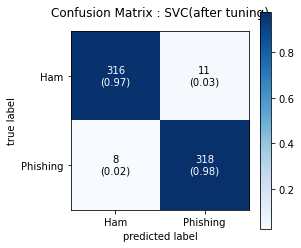

              precision    recall  f1-score   support

           0     0.9753    0.9664    0.9708       327
           1     0.9666    0.9755    0.9710       326

    accuracy                         0.9709       653
   macro avg     0.9709    0.9709    0.9709       653
weighted avg     0.9709    0.9709    0.9709       653

MCC:  0.942
Log Loss:  0.11
f1:  97.099
Balanced Accuracy:  97.091
Accuracy:  97.09
ROC_AUC :  97.091


In [75]:

print(SVMC_best)
show_performance_metrics(gsSVMC,"SVC(after tuning)",X_test)

### Logistic Regression

In [72]:
LR = LogisticRegression()

lr_param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty' : ['l2'],
                 'C' : [1.0, 0.1, 1.5,2.5,5,5.5,0.01]}

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsLR.fit(X_train,Y_train)

LR_best = gsLR.best_estimator_

# Best score
gsLR.best_score_



Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    0.8s finished


0.9727907444528725

LogisticRegression(C=2.5, solver='newton-cg')


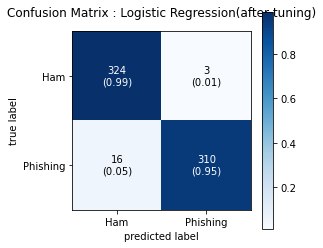

              precision    recall  f1-score   support

           0     0.9529    0.9908    0.9715       327
           1     0.9904    0.9509    0.9703       326

    accuracy                         0.9709       653
   macro avg     0.9717    0.9709    0.9709       653
weighted avg     0.9716    0.9709    0.9709       653

MCC:  0.943
Log Loss:  0.162
f1:  97.027
Balanced Accuracy:  97.087
Accuracy:  97.09
ROC_AUC :  97.087


In [74]:

print(LR_best)
show_performance_metrics(gsLR,"Logistic Regression(after tuning)",X_test)

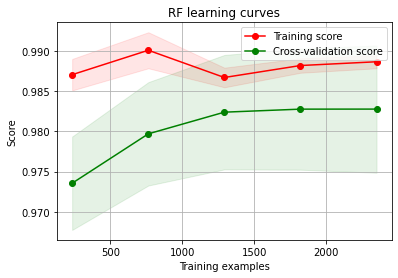

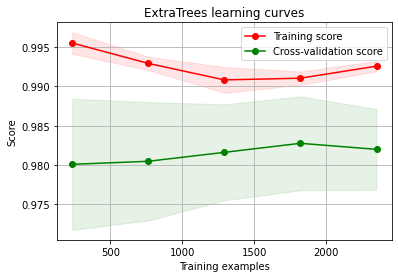

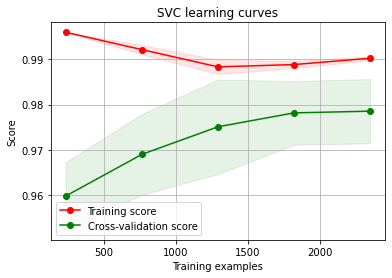

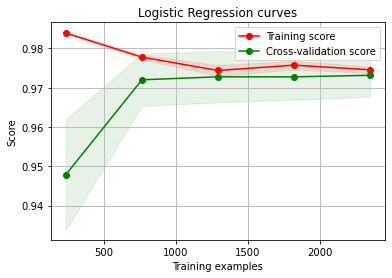

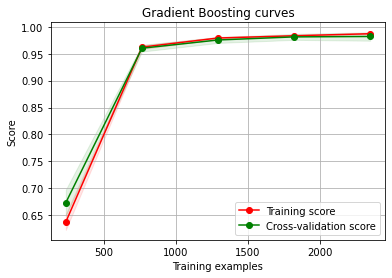

In [64]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,scoring='balanced_accuracy', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
kfold = 10
g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLR.best_estimator_,"Logistic Regression curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"Gradient Boosting curves",X_train,Y_train,cv=kfold)
# g = plot_learning_curve(soft_voting_model,"Voting Model learning curves",X_train,Y_train,cv=kfold)


Now, if we try to focus a bit on learning curve it reveals that:
- After a particular training size, SVC balances the bias and variance trade off and the curves are at almost same gap forward to the adequate training size.
- ExtraTrees also performed decent but after a point excess training leads to a slight increase in bias and then resulting underfitting.
- Random Forest also follows almost same trends as SVC, achieving decent balance between bias and variance.
- At last Logistic Regression and GradientBoosting are highly overfitting.<br><br>
So, for voting classifier we will go with three models:
- SVC (C=3, gamma=0.1, probability=True)
- ExtraTrees Classifier (max_features=1, min_samples_split=10, n_estimators=300)
- Random Forest Classifier (bootstrap=False, max_features=3, min_samples_leaf=3,min_samples_split=3)
<br>Above all three have good balanced accuracy and also do well on balancing the bias and variance trade off.

##  Ensemble Model (Voting Classifier)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   50.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.4min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   34.9s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   44.6s finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   16.2s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   38.6s
[Parallel(n_jobs=4)]: Done 634 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 984 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.4min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   27.9s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   43.4s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   44.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   17.2s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   49.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.3min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   28.1s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   43.2s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   44.0s finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   16.4s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   37.4s
[Parallel(n_jobs=4)]: Done 634 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 984 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.3min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   27.6s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   43.0s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   43.6s finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   15.7s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 364 tasks      | elapsed:   37.5s
[Parallel(n_jobs=4)]: Done 614 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 964 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  3.1min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   39.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.8s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   43.6s finished




Total Average Accuracy is  98.0833 %


VotingClassifier(estimators=[('Random Forest Model',
                              GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                                           estimator=RandomForestClassifier(),
                                           n_jobs=4,
                                           param_grid={'bootstrap': [False],
                                                       'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [None],
                                                       'max_features': [1, 3,
                                                                        10],
                                                       'min_samples_leaf': [1,
                                                                            3,
                                                                            10],


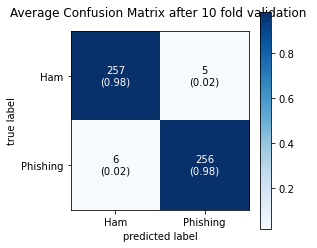

In [28]:
voting_model = VotingClassifier(
    [
        ("Random Forest Model", gsRFC),
        ("ExtraTrees Classifier",gsExtC),
        ("SVC",gsSVMC)
    ]
) 


training_and_cross_validation(voting_model)



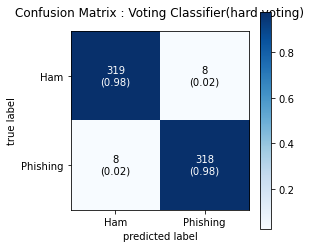

              precision    recall  f1-score   support

           0     0.9755    0.9755    0.9755       327
           1     0.9755    0.9755    0.9755       326

    accuracy                         0.9755       653
   macro avg     0.9755    0.9755    0.9755       653
weighted avg     0.9755    0.9755    0.9755       653

MCC:  0.951
Log Loss:  N/A
f1:  97.546
Balanced Accuracy:  97.55
Accuracy:  97.55
ROC_AUC :  97.55


In [53]:
MODEL.append("Voting Classifier(hard voting)")
show_performance_metrics(voting_model,"Voting Classifier(hard voting)")
   


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  6.5min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   39.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.5s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   43.2s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   50.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  6.8min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   40.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.1s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   42.4s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  6.6min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   37.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.4s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   43.2s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   47.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  6.4min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   37.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.5s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   43.2s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   50.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  5.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   21.2s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   33.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   33.7s finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   12.6s finished




Total Average Accuracy is  98.0068 %


VotingClassifier(estimators=[('Random Forest Model',
                              GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                                           estimator=RandomForestClassifier(),
                                           n_jobs=4,
                                           param_grid={'bootstrap': [False],
                                                       'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [None],
                                                       'max_features': [1, 3,
                                                                        10],
                                                       'min_samples_leaf': [1,
                                                                            3,
                                                                            10],


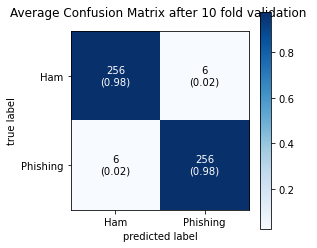

In [30]:
soft_voting_model = VotingClassifier(
    [
        ("Random Forest Model", gsRFC),
        ("ExtraTrees Classifier",gsExtC),
        ("SVC",gsSVMC)
    ],voting="soft",flatten_transform=True
)

training_and_cross_validation(soft_voting_model)



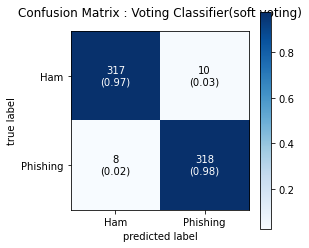

              precision    recall  f1-score   support

           0     0.9754    0.9694    0.9724       327
           1     0.9695    0.9755    0.9725       326

    accuracy                         0.9724       653
   macro avg     0.9724    0.9724    0.9724       653
weighted avg     0.9725    0.9724    0.9724       653

MCC:  0.945
Log Loss:  0.094
f1:  97.248
Balanced Accuracy:  97.244
Accuracy:  97.243
ROC_AUC :  97.244


In [54]:
MODEL.append("Voting Classifier(soft voting)")
show_performance_metrics(soft_voting_model,MODEL[-1])


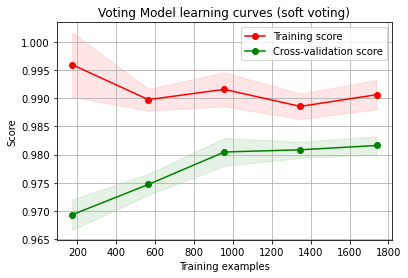

In [79]:
g = plot_learning_curve(soft_voting_model,"Voting Model learning curves (soft voting)",X_train,Y_train,cv=3,n_jobs=-1)

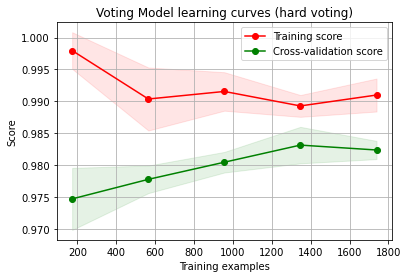

In [77]:
g = plot_learning_curve(voting_model,"Voting Model learning curves (hard voting)",X_train,Y_train,cv=3)

Both voting methods performed almost exactly same. Athough they have slight less accurate, yet they have very good balance in bias and variance trade off. They can be very useful in real world application as they tend not to overfit the training data while minimizing the gap between training and cross validation error. Thus, it could be inferred that they will perform better in real world application.

## Performance Comparisons

In [58]:
performance_comp = []
performance_comp.append(["Model","Accuracy","Balanced Accuracy","Log loss","F1 Score","MCC","ROC_AUC","Report"])
for model in MODEL:
    row = []
    row.append(model)
    row.append(ACCURACY[model])
    row.append(BALANCED_ACCURACY[model])
    row.append(LOG_LOSS[model])
    row.append(F1[model])
    row.append(MCC[model])
    row.append(ROC_AUC[model])
    row.append(REPORT[model])
    performance_comp.append(row)
performance_comp = pd.DataFrame(performance_comp[1:],columns=performance_comp[0])
performance_comp
# performance_comp.to_csv('performance comparision.csv')

,Model,Accuracy,Balanced Accuracy,Log loss,F1 Score,MCC,ROC_AUC,Report
0,Logistic Regression(before tuning),95.100,95.100,0.205,95.122,0.902,95.100,precision recall f1-score ...
1,Logistic Regression(after tuning),97.090,97.087,0.162,97.027,0.943,97.087,precision recall f1-score ...
2,SVC (before tuning),94.793,94.794,0.139,94.801,0.896,94.794,precision recall f1-score ...
3,SVC(after tuning),97.090,97.091,0.11,97.099,0.942,97.091,precision recall f1-score ...
4,Gradient Boosting Classifier (before tuning),97.550,97.549,0.093,97.538,0.951,97.549,precision recall f1-score ...
5,Gradient Boosting(after tuning),98.009,98.008,0.072,97.991,0.960,98.008,precision recall f1-score ...
6,ExtraTrees Classifier (before tuning),97.550,97.550,0.092,97.546,0.951,97.550,precision recall f1-score ...
7,ExtraTrees Classifier(after tuning),98.469,98.468,0.071,98.462,0.969,98.468,precision recall f1-score ...
8,Random Forest Classifier (before tuning),98.315,98.315,0.143,98.310,0.966,98.315,precision recall f1-score ...
9,Random Forest(after tuning),98.469,98.468,0.066,98.457,0.969,98.468,precision recall f1-score ...


In [59]:
import re
import sklearn

import seaborn as sns
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


y = performance_comp['Balanced Accuracy'].values
x = MODEL
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color =  performance_comp['Balanced Accuracy'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Balanced Accuracy comparison of models',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Balanced Accuracy',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')



In [143]:
import re
import sklearn

import seaborn as sns
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


y = performance_comp['MCC'].values
x = MODEL
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color =  performance_comp['MCC'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'MCC comparison of models',
    hovermode= 'closest',

    yaxis=dict(
        title= 'MCC',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')



## Conclusions

During the research both ExtraTrees Classifier and Random Forest were really close to each other performance wise. Although balanced accuracy of both the ExtraTrees Classifier and Random Forest are same yet Random Forest has good log loss score in comparison to ExtraTrees.<br><br>
Random Forest came out as the better model to identify the phishing mail considering the selected features than ExtraTrees as it has decent balance of bias and variance. SVC would also be a really good choice in real world as shown in research it smoothly balances the bias and variance tradeoff thus it learns while training still it doesn’t overfit and can perform really good in new data.<br><br>
The bar plot above shows how the models performed in terms of balanced accuracy score. We can see every model has improved the performance after tuning up.

Following inferences are made from the research :
1. Best performing model is hyperparameter tuned Random Forest Classifier with accuracy of 98.469% and log loss of 0.066.and parameters are (bootstrap=False,max_features=3,min_leaf_sample=3,min_sample_split=3)
2. Although Random Forest performed best in our research experiment, SVM and Voting Classifier turns out to be better in balancing bias and variance tradeoff.
3. Logistic Regression and Gradient Boosting tend to overfit so better to avoid or use in a way that can counter the overfitting. For example, we can include them in model stacking or voting classifier and counter the overfit by adjusting the weights.
4. Lastly, it is evident that to have better real world performing model we can go for Voting Classifier. We can have better performance to new test data while sacrificing minimal accuracy.

## Future Work

Feature selection techniques need more improvement to cope with the continuous development of new techniques by the phishers over the time. Therefore, it is recommended to developing a new automated tool in order to extract new features from new raw emails to improve the accuracy of detecting phishing email and to cope with the expanding with phisher techniques.